In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.datasets import make_moons
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.metrics import accuracy_score

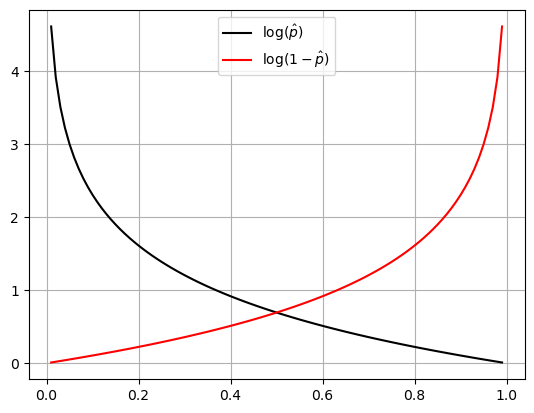

In [5]:
t = np.linspace(0, 1, num=101)
plt.plot(t[1:-1], -np.log(t[1:-1]), label='$\log(\hat{p})$', color='black')
plt.plot(t[1:-1], -np.log(1 - t[1:-1]), label='$\log(1-\hat{p})$', color='red')
plt.legend()
plt.grid()
plt.show()

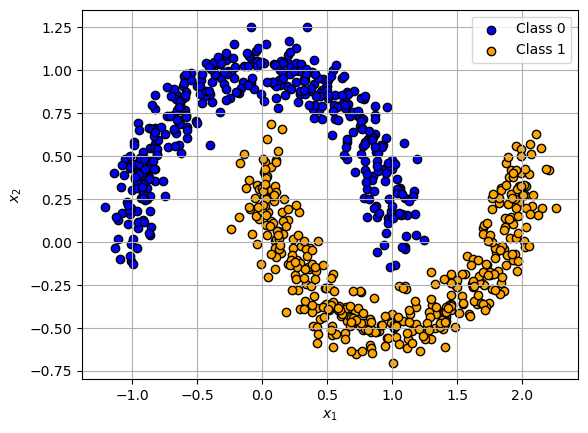

In [64]:
X, y = make_moons(n_samples=800, noise=0.1)

plt.figure()
plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0', color='blue', edgecolors='black')
plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1', color='orange', edgecolors='black')
plt.legend()
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [65]:
classificator = LogisticRegression(penalty=None)
classificator.fit(X, y)
print('h(x_1,x_2) = %2.2f + %2.2f x_1 + %2.2f x_2' %
    (classificator.intercept_[0], classificator.coef_.flatten()[0], classificator.coef_.flatten()[1]))

h(x_1,x_2) = 0.92 + 1.19 x_1 + -5.91 x_2


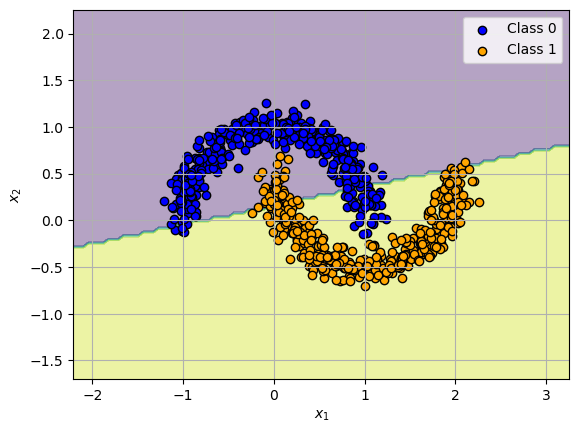

In [66]:
disp = DecisionBoundaryDisplay.from_estimator(classificator, X, response_method='predict', alpha=0.4)
disp.ax_.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0', edgecolors='black')
disp.ax_.scatter(X[y==1, 0], X[y==1, 1], color='orange', label='Class 1', edgecolors='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
disp.ax_.grid()
disp.ax_.legend()


In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [68]:
nonLinearClassificator = Pipeline((
    ('poly_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('lin_reg', LogisticRegression(penalty=None))
)).fit(X, y)

In [69]:
print('h(phi(x)) = (%2.2f) + (%2.2f) x_1 + (%2.2f) x_2 + (%2.2f) x_1^2 + (%2.2f) x_1x_2 + (%2.2f) x_2^2 + (%2.2f) x_1^3 + (%2.2f) x_1^2x_2 + (%2.2f) x_2^3' %
      (nonLinearClassificator[1].intercept_[0],
       nonLinearClassificator[1].coef_[0, 1],
       nonLinearClassificator[1].coef_[0, 2],
       nonLinearClassificator[1].coef_[0, 3],
       nonLinearClassificator[1].coef_[0, 4],
       nonLinearClassificator[1].coef_[0, 5],
       nonLinearClassificator[1].coef_[0, 6],
       nonLinearClassificator[1].coef_[0, 7],
       nonLinearClassificator[1].coef_[0, 8]))

h(phi(x)) = (103.90) + (-94.51) x_1 + (-260.88) x_2 + (-3.91) x_1^2 + (0.94) x_1x_2 + (167.62) x_2^2 + (-90.88) x_1^3 + (79.68) x_1^2x_2 + (-76.77) x_2^3


In [70]:
nonLinearClassificator[1].coef_[0, 0]

-50.05694604024284

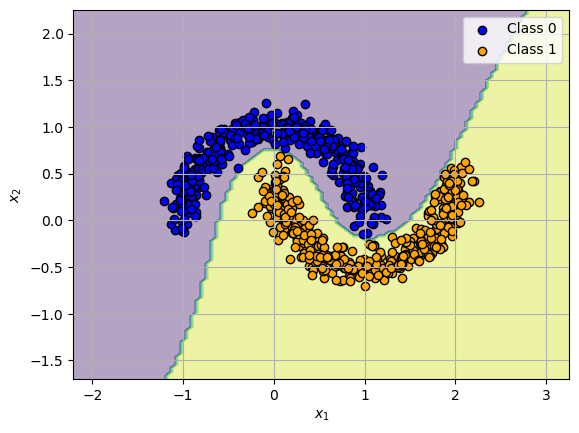

In [71]:
disp = DecisionBoundaryDisplay.from_estimator(nonLinearClassificator, X, response_method='predict', alpha=0.4)
disp.ax_.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0', edgecolors='black')
disp.ax_.scatter(X[y==1, 0], X[y==1, 1], color='orange', label='Class 1', edgecolors='black')
disp.ax_.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
disp.ax_.grid()

In [72]:
accuracy_score(y, classificator.predict(X)), accuracy_score(y, nonLinearClassificator.predict(X))

(0.8825, 1.0)